## EE 461P: Data Science Principles  
### Assignment 3 
### Total points: 90
### Due: Tuesday, Mar 8, 2022, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Harshika Jha hj6963
2. Jared McArthur jtm4343

### Homework group No.: 

# Question 1 Stochastic Gradient Descent - (20 pts)
(a). (**10 pts**) Using stochastic gradient descent, derive the coefficent updates for all 6 weights of the model (assuming squared error as your loss function): 
$$ y = w_0 + w_1x_{1} + w_2x_{2} + w_3x_{1}x_{2} + w_4e^{-x_{1}x_{2}}+ w_5log_{e}(x_{3})$$ 
where $(x_i,t_i)$ is the $i$-th point in the data set

  Note: For a single point $(x_i,t_i)$, in the given dataset, let:
  \begin{equation}
  E_i(w) =  t_i -(w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i1}x_{i2} + w_4e^{-x_{i1}x_{i2}}+ w_5log_{e}(x_{i3}))
  \end{equation}
  Express the partial derivatives in your update equations in the form of $E_i(w)$, $x_{i1}$,$x_{i2}$, and $x_{i3}$


(b) (**10 pts**)Download the x and t data arrays  from the following links respectively (There are 2000 points in total)
https://drive.google.com/file/d/1xhXhGmsLCBYqVmUAXktFemyNwee9HNF4/view?usp=sharing


https://drive.google.com/file/d/1--2vBshmb3Havi4kuSWo5A-t-WAxWcc1/view?usp=sharing

Initialize the weights from the zero mean normal distribution with standard deviation of 3. Set the learning rate to $10^{-4}$. For 100 epochs (An epoch is completed when we have passed through the entire training dataset), learn the weights using stochastic gradient descent.You are only allowed to use the numpy and matplotlib libraries.  Calculate the MSE at the end of each epoch and plot it against the epochs. What are the weights that are learned? (You do not need to separate data in training set and testing sets)

## Answer 1 (a).

https://drive.google.com/file/d/1BmiB8SIjRr_qDCzXcygc97PnXlyX6xNP/view?usp=sharing

## Answer 1 (b)

In [ ]:
x=np.load('x.npy')
t=np.load('y.npy')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
class SGD:
    def __init__(self, learning_rate, regularization_constant, num_epochs):
        self.learning_rate = learning_rate
        self.regularization_constant = regularization_constant
        self.num_epochs = num_epochs
        self.coef_ = [0, 0, 0, 0]
        self.coefficients = []
        self.mses = []
        self.losses = 0
        
    def fit(self, X, y, update_rule):
        x1 = X['x_1']
        x2 = X['x_2']
        x1x2 = X['x_1'] * X['x_2']
        
        cache = [0, 0, 0, 0]
        for epoch in range(self.num_epochs):
            loss = []
            for i in range(len(x1)):
                predictY = self.coef_[0] + self.coef_[1]*x1[i] + self.coef_[2]*x1x2[i] + self.coef_[3]*x2[i]
                                
                grad = [0,0,0,0]
                grad[0] = predictY - y[i] + self.coef_[0]
                grad[1] = grad[0]*x1[i] + self.coef_[1]
                grad[2] = grad[0]*x1x2[i] + self.coef_[2]
                grad[3] = grad[0]*x2[i] + self.coef_[3]
                
                if(update_rule is "adagrad"):
                    cache[0] += grad[0]**2
                    cache[1] += grad[1]**2
                    cache[2] += grad[2]**2
                    cache[3] += grad[3]**2
                
                    self.coef_[0] = self.coef_[0] - (self.learning_rate)/np.sqrt(cache[0] + 1e-6) * (grad[0] + self.regularization_constant * self.coef_[0])
                    self.coef_[1] = self.coef_[1] - (self.learning_rate)/np.sqrt(cache[1] + 1e-6) * (grad[1] + self.regularization_constant * self.coef_[1])
                    self.coef_[2] = self.coef_[2] - (self.learning_rate)/np.sqrt(cache[2] + 1e-6) * (grad[2] + self.regularization_constant * self.coef_[2])
                    self.coef_[3] = self.coef_[3] - (self.learning_rate)/np.sqrt(cache[3] + 1e-6) * (grad[3] + self.regularization_constant * self.coef_[3])
                    
                elif update_rule is "SGD":
                    self.coef_[0] = self.coef_[0] - self.learning_rate * (grad[0] + self.regularization_constant * self.coef_[0])
                    self.coef_[1] = self.coef_[1] - self.learning_rate * (grad[1] + self.regularization_constant * self.coef_[1])
                    self.coef_[2] = self.coef_[2] - self.learning_rate * (grad[2] + self.regularization_constant * self.coef_[2])
                    self.coef_[3] = self.coef_[3] - self.learning_rate * (grad[3] + self.regularization_constant * self.coef_[3])

                loss.append((y[i]-predictY)**2 )
            mse = np.mean(np.array(loss))
            self.mses.append(mse)
            
            if epoch is self.num_epochs - 1:
                self.losses = mse
    
    def predict(self, X):
        x1 = X['x_1']
        x2 = X['x_2']
        x1x2 = X['x_1'] * X['x_2']

        y = self.coef_[0] + self.coef_[1]*x1 + self.coef_[2]*x1x2 + self.coef_[3]*x2

        return y 

In [ ]:
dx = x.to_csv(x)     
df = pd.read_csv(dx)
X_train, X_test, y_train, y_test = train_test_split(df[['x_1', 'x_2']], df['y'], test_size = 0, random_state = 10)


losses_sgd = []
mses_sgd = []
regConsts_sgd = []
learningRates_sgd = []
num_epochs_sgd = 10
for learning_rate in [.0001, .001, .01, 0.1, 1, 10, 100]:
    for regularization_constant in [0,10,100]:
        mySGD = SGD(learning_rate, regularization_constant, 10)
        mySGD.fit(X_train, y_train, "SGD")
        #predictedY = mySGD.predict(X_test)
        losses_sgd.append(mySGD.losses)
        mses_sgd.append(mySGD.mses)
        regConsts_sgd.append(regularization_constant)
        learningRates_sgd.append(learning_rate)

print("SGD:")
print("Smallest mse:", min(losses_sgd), "reg const:", regConsts_sgd[losses_sgd.index(min(losses_sgd))],"learning rate:", learningRates_sgd[losses_sgd.index(min(losses_sgd))])



In [ ]:
fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(10), mses_sgd[losses_sgd.index(min(losses_sgd))])
plt.title('MSE plots against epoches count for best SGD')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

regConsts_sgd.remove(regConsts_sgd[losses_sgd.index(min(losses_sgd))])
learningRates_sgd.remove(learningRates_sgd[losses_sgd.index(min(losses_sgd))])
losses_sgd.remove(min(losses_sgd))
mses_sgd.remove(mses_sgd[losses_sgd.index(min(losses_sgd))])

print("Second smallest mse:", min(losses_sgd), "reg const:", regConsts_sgd[losses_sgd.index(min(losses_sgd))],"learning rate:", learningRates_sgd[losses_sgd.index(min(losses_sgd))])

fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(10), mses_sgd[losses_sgd.index(min(losses_sgd))])
plt.title('MSE plots against epoches count for second best SGD')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# Question 2 - Activation functions (10 points)
The Rectified Linear unit (ReLU) function is defined as
$$f(u)=max(0,u)$$ 
and

Sigmoid activation function is defined as 
$$f(u)=\frac{1}{1+e^{-u}}$$ 

(a) (5 points) Let $\psi(u)=ReLU(-ReLU(u))$. Suppose we use this as the activation function employed for  one of the hidden layers, what is expected to happen to the output of a Neural network? 

(b) (5 points) Let our target variable in a regression problem be uniformally distributed in the range -10 to 10. What would be the limitation of the model if the sigmoid activation function is used for  the output cell of a Neural Network that aims to train on such data?

## Answer 2

(a) The gradient value becomes 0 on the negative and positive sides of the graph. 

(b) output of all neurons must be the same sign (positive or negative); not symmetric around 0

# Question 3 : Backpropagation and Neural Networks (20 points)

Consider the neural network shown in the figure. The input to the network is a 2-dimensional vector $(x_{1}, x_{2})$ and there is no bias term. The network has 2 layers (note that there is only one hidden unit) and 3 weights - $w_{1}$ , $w_{2}$ and $w_{3}$  along with a sigmoid activation function $s(\alpha) = \frac{1}{1 + e^{-\alpha}}$.

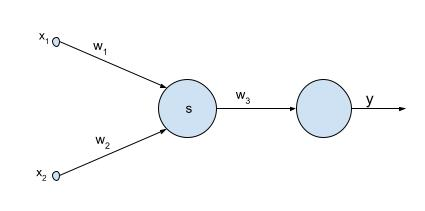

The expression for the output $y$ of the network can be written as -

$$ t = w_{3} * s(w_{1}*x_{1} + w_{2}*x_{2}) $$

Suppose that the true label for this particular input was supposed to be $y$, leading to the squared prediction error $ L = (t - y)^{2} $ (Here $t$ represents the output of the network). 

Derive the update equations for the following two  weights 

a) $w_{3}$ (5 points)

b) $w_{1}$ (10 points)

backpropagation is performed based on this error, using the 
learning rate $\eta$.

## Answer 3.

https://drive.google.com/file/d/1YuocPF-VAzZKIrPmjc2EMiLfP_yDMZVp/view?usp=sharing

# Question 4 : Pre-processing and MLP Regression (30 points)

Suppose you are the owner of an online business. You want to consider displaying advertisements on your website to increase your revenue.

There are 5 different agencies you can consider - Agency A, B, C, D and E. Each of these agencies display different type of advertisements, and offer different revenue models. The revenue is governed by the click-through-rate (number of clicks per unit hour) that your website achieves for different advertisements.

As a data scientist, you decide to conduct an experiment using the different available agencies to decide which one is the best, by showing different advertisments for a 1-hour window each. Through the logs of the website, you gather the following data (Each entry represents information about a click made on an advertisement on the website) - 

1. `advertisement_index` : An identifier for the advertisement being displayed
2. `time_of_day` : The time of the day at which the advertisement was clicked
3. `day_of_week` : The day of the week on which the advertisement was clicked
4. `agency`      : The agency which was responsible for the advertisement being displayed
5. `text_image_ratio` : The ratio of text to image on the advertisement being displayed
6. `number_of_users` : The number of users who have visited on the day until this click

You can find the data required for Problem 4 [here](https://drive.google.com/drive/folders/1BIGdwGFkjNALdHsv-X-UPTTzv_tOOoFx?usp=sharing). You should first download the data from the drive, and upload it on the Google Colab. 

In [ ]:
#@title Common Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import datetime
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
data = pd.read_csv('data_problem4.csv', parse_dates=True)
data['time_of_day'] = pd.to_datetime(data['time_of_day'])

## 1. [7 points] Pre-processing

a) [1 points] Print out the first 5 rows of the data.

In [ ]:
for i in range(0, 5):
  print(data.loc[i,:])

b) [5 points] You will notice that we don't have a column labelled as the `click_through_rate` in the data, based on which you are actually supposed to make your decision for the best agency. However, you do have information about individual clicks. 

To get an estimate for the `click_through_rate` you decide to group the clicks by discretising them in bins of 1 hour each - 
{ (0-1), (1-2) ... (23-24) } (The times are represented in 24 hr format).


For this problem, create a new dataframe with the following columns - 

1. `advertisement_index` : An identifier for the advertisement being displayed
2. `start_time` : The start time of the bin (Should be a value from {0, 1, 2 ... 24})
3. `day_of_week` : The day of the week on which the advertisement was being displayed
4. `number_of_clicks` : The number of clicks in the duration - (`start_time`, `start_time` + 1)
5. `agency` : The agency which was responsible for the advertisement being displayed
6. `text_image_ratio` : The ratio of text to image on the advertisement being displayed
7. `avg_number_of_users` : The average number of users who visited the website in the duration of (`start_time`, `start_time` + 1)


(Note : There can be multiple ways to do this. The most straightforward one I could think of is - you can just iterate through the data row-by-row, consider entries with the same `advertisement_index` and divide them into the required bins. You can assume that each advertisement was only shown for a 1-hour window, so the start of the bin would just be the hour component of the time.)

In [ ]:
ad_dict = {
    "advertisement_index": [],
    "start_time": [],
    "day_of_week": [],
    "number_of_clicks": [],
    "agency": [],
    "text_image_ratio": [],
    "avg_number_of_users": []
}

# tuple of info: (agency, text_image_ratio)
info_dict = {}
# ad_index -> day of week -> hour
num_users_dict = {}
clicks_dict = {}
for i in range(len(data)):
  ad_index = data.loc[i].at["advertisment_index"]
  day_of_week = data.loc[i].at["day_of_week"]
  hour = data.loc[i].at["time_of_day"].hour
  num_users = data.loc[i].at["number_of_users"]
  agency = data.loc[i].at["agency"]
  text_image_ratio = data.loc[i].at["text_image_ratio"]

  if (clicks_dict.get(ad_index) == None):
    clicks_dict[ad_index] = {}
    num_users_dict[ad_index] = {}
  if (clicks_dict.get(ad_index).get(day_of_week) == None):
    clicks_dict.get(ad_index)[day_of_week] = {}
    num_users_dict.get(ad_index)[day_of_week] = {}
  
  if (clicks_dict.get(ad_index).get(day_of_week).get(hour) == None):
    clicks_dict.get(ad_index).get(day_of_week)[hour] = 1
    num_users_dict.get(ad_index).get(day_of_week)[hour] = []
  else:
    clicks_dict.get(ad_index).get(day_of_week)[hour] = clicks_dict.get(ad_index).get(day_of_week).get(hour) + 1

  num_users_dict.get(ad_index).get(day_of_week).get(hour).append(num_users)
  info_dict[ad_index] = (agency, text_image_ratio)

# avg num users is the diff btwn the max for that time and day since that is the number of users that accessed during that time.
# at least according to the description of number_of_users
for ad_index, ad_index_days in clicks_dict.items():
  for day, hours_in_day in ad_index_days.items():
    for hour, clicks in hours_in_day.items():
      ad_dict["advertisement_index"].append(ad_index)
      ad_dict["start_time"].append(hour)
      ad_dict["day_of_week"].append(day)
      ad_dict["number_of_clicks"].append(clicks)
      ad_dict["agency"].append(info_dict.get(ad_index)[0])
      ad_dict["text_image_ratio"].append(info_dict.get(ad_index)[1])
      ad_dict["avg_number_of_users"].append(max(num_users_dict.get(ad_index).get(day).get(hour)) - min(num_users_dict.get(ad_index).get(day).get(hour)))

new_df = pd.DataFrame.from_dict(ad_dict)

(c) [1 points] Print out the shape of the new dataframe (Expected to be (2979,7)) and the first 5 rows.

Now since we have bucketed by 1-hour windows, the number of clicks in that window can be treated as a measure of the `click-through-rate`. Therefore, we are going to use the `number_of_clicks` as our response variable in the subsequent parts of the question to find the best advertising agency. 

In [ ]:
print(new_df.shape)

for i in range(0, 5):
  print(new_df.loc[i,:])

## 2. [5 points] Visualisation

a) [1 points] Plot a graph of the Average `number_of_clicks` vs the `start_time` and mention your observations. (For a particular value of the `start_time`, average the `number_of_clicks`.) [Use the [pandas.groupby(.)](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function to help with aggregation]

In [ ]:
clicks_v_start_time = new_df.groupby("start_time").agg(avg_num_clicks=("number_of_clicks", np.mean))

plt.plot(clicks_v_start_time)

b) [1 points] Plot a graph of the Average `number_of_clicks` vs the `day_of_week` and mention your observations. (For a particular value of the `day_of_week`, average the `number_of_clicks`.) [Use the [pandas.groupby(.)](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function to help with aggregation]

[Hint : Order the `day_of_week` from Monday to Sunday to observe a neat trend]

In [ ]:
clicks_v_day_of_week = new_df.groupby("day_of_week").agg(avg_num_clicks=("number_of_clicks", np.mean))

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
clicks_v_day_of_week.loc[day_order].plot(legend=False)

c) [1 points] Plot a graph of the Average `number_of_clicks` vs the `agency` and mention your observations. (For a particular value of the `agency`, average the `number_of_clicks`.) [Use the [pandas.groupby(.)](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function to help with aggregation]

[Hint : Order the `agency` from Agency A to E to observe a neat trend]

In [ ]:
clicks_v_agency = new_df.groupby("agency").agg(avg_num_clicks=("number_of_clicks", np.mean))

plt.plot(clicks_v_agency)

d) [1 points] Divide the `text_image_ratio` into 10 equally-sized bins. Plot a graph of the average `number_of_clicks` in each bin vs the bins and mention your observations.

[Hint : Use the [pandas.cut(.)](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function to add a new column with bins, and the [pandas.groupby(.)](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function to help with aggregation]

In [ ]:
new_df["ratio_bins"] = pd.qcut(new_df["text_image_ratio"], q=10)

clicks_v_ratio_bins = new_df.groupby("ratio_bins").agg(avg_num_clicks=("number_of_clicks", np.mean))

plt.plot(clicks_v_ratio_bins)

e) [1 points] Divide the `number_of_users` into 10 equally-sized bins. Plot a graph of the average `number_of_clicks` in each bin vs the bins and mention your observations.

[Hint : Use the [pandas.cut(.)](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function to add a new column with bins, and the [pandas.groupby(.)](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function to help with aggregation]

In [ ]:
new_df["user_bins"] = pd.qcut(new_df["avg_number_of_users"], q=10, duplicates="drop")

clicks_v_user_bins = new_df.groupby("user_bins").agg(avg_num_clicks=("number_of_clicks", np.mean))

plt.plot(clicks_v_user_bins)

## 3. [5 points] Transformation

[5 points] Looking at the graphs in the previous section, you might have noticed that there does not exist a linear relationship between the predictor and response variables. Can you think of a transformation you can apply to the `number_of_clicks` so that the transformed variable and the predictor variables have a reasonably linear relationship?

Create a new column in the data-frame with the transformed variable and plot all the graphs plotted in the previous section to verify that a linear relationship now exists.

In [ ]:
new_df["transform"] = np.where(True, 1 / new_df["number_of_clicks"], 1 / new_df["number_of_clicks"])

clicks_v_start_time = new_df.groupby("start_time").agg(transform=("transform", np.mean))
clicks_v_start_time.plot()


clicks_v_day_of_week = new_df.groupby("day_of_week").agg(transform=("transform", np.mean))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
clicks_v_day_of_week.loc[day_order].plot(legend=False)

clicks_v_agency = new_df.groupby("agency").agg(transform=("transform", np.mean))
clicks_v_agency.plot()

new_df["ratio_bins"] = pd.qcut(new_df["text_image_ratio"], q=10)
clicks_v_ratio_bins = new_df.groupby("ratio_bins").agg(transform=("transform", np.mean))
clicks_v_ratio_bins.plot()

new_df["user_bins"] = pd.qcut(new_df["avg_number_of_users"], q=10, duplicates="drop")
clicks_v_user_bins = new_df.groupby("user_bins").agg(transform=("transform", np.mean))
clicks_v_user_bins.plot()

## 4. [4 points] Feature Selection

a) [2 points] Find the correlation matrix of the following variables and plot a heatmap.

1. `start_time`
5. `text_image_ratio`
6. `avg_number_of_users`

[Hint : See Homework 1]

In [ ]:
x = new_df[["start_time", "text_image_ratio", "avg_number_of_users"]]

his = sns.diverging_palette(100,100,as_cmap = True)
sns.heatmap(data = x.corr())

b) [2 points] Do you see anything weird in the matrix? Identify any variables that seem to be highly correlated to each other and eliminate one of them. 

In this matrix, nothing looks highly correlated. I assume this is because my avg number of users is incorrect due to the way I interpretted it.

## 5. [2 points] Dummy Coding

Use [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to dummy code `day_of_week` and `agency`. Recall that categorical variables need to be dummy coded before they can be used in models.

In [ ]:
dummies = pd.get_dummies(new_df[["day_of_week", "agency"]])

## 6. [7 points] Training

a) [3 points] Ok so finally, after all our explorations, we are at the last stage. We are going to train an MLP model for our problem.

Use the following set of variables as your predictor variables - 

1. `start_time`
2. `day_of_week` (dummy coded)
3. `agency` (dummy coded)
4. `text_image_ratio`



Using Multi-layer Perceptron regressor, fit a regression model with `alpha=0` on all the feature variables using a 80-20 split of the entire dataset. Report the total of number of weights present in the weight matrix (obtained using `model.coefs_`) and evaluate the model using mean squared error (MSE) on the test and training sets. An example is shown in [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



b) [2 points] Predict the number of clicks using the trained model for the training and test datasets. Don't forget to apply the inverse of the transformation you had applied previously. Plot a graph each for the training and test datasets of the average `number_of_clicks` and the average `predicted_number_of_clicks` vs the `start_time` and mention your observations. (For a particular value of the `start_time`, average the `number_of_clicks` and the `predicted_number_of_clicks`.) [Use the [pandas.groupby(.)](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) function to help with aggregation]

c) [2 points] Based on your model, let's say you are supposed to select an advertisement agency to display an advertisement on Wednesday afternoons from 12-1 PM. You ask the agencies to propose advertisements to bid for the slot. The values of the text_image_ratio of their proposed advertisements are given below - 

1. Agency A : 0.2
2. Agency B : 0.25
3. Agency C : 0.15
4. Agency D : 0.3
5. Agency E : 0.4

Which agency would you select to maximise your `click-through-rate` on the advertisement during that 1 hour?

Agency A

# Question 5 : Sample Size Computation (10 points)



a) (5 points) A manager of a supermarked needs to estimate the proportion of their customers that are vegan. Each day, a lot of people visit the store, so it is not possible to survey everyone. The manager decides to survey a smaller sample of the population to get an estimate. Since the true proportion of vegan customers is not known, it can be any value, even 50%!. The manager requests you to help him out. 


Determine the sample size necessary to estimate the proportion of people shopping at the supermarket that identify as vegan with 95% confidence, and a margin of error of 5%. 

Answer 5(a) 385

b) (3 points) Let's say that now we know that the true proportion of vegan customers can not exceed 10%. How many samples would now be required to estimate with 95% confidence and a 5% margin of error?

Answer 5(b) 139

c) (2 points) Further, after part b), let's say we reduce the margin of error to 2%, keeping everything else the same. What would the number of required samples be now?

Answer 5(c) 865